## Importing libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
 
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

## Loading dataset

In [3]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
 
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [4]:
boston_features = {
    'Average Number of Rooms':5,
}
 
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)
 
X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404,)


## Visualizations

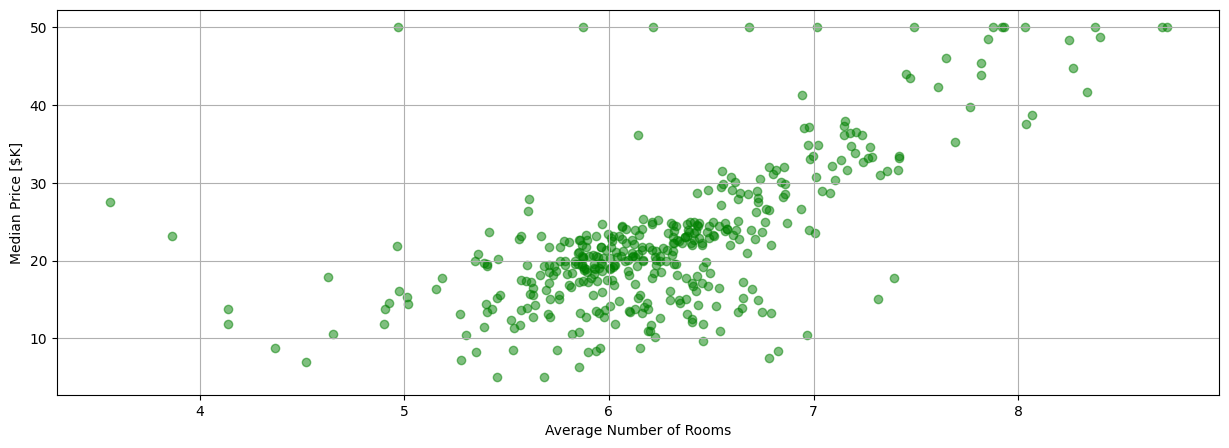

In [5]:
plt.figure(figsize=(15, 5))
 
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

## Model Building

In [6]:
model = Sequential()
 
# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))
 
# Display a summary of the model architecture.
model.summary()

C:\Users\gauri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), loss='mse')

## Model Fitting

In [8]:
history = model.fit(X_train_1d, 
                    y_train, 
                    batch_size=16, 
                    epochs=101, 
                    validation_split=0.3)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 590.4394 - val_loss: 699.3784
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 553.5223 - val_loss: 666.7132
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 524.8434 - val_loss: 635.9022
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 497.5929 - val_loss: 606.0754
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 471.2528 - val_loss: 577.1118
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 445.7496 - val_loss: 548.9930
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 421.0719 - val_loss: 521.7157
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 397.2171 - val_loss: 495.2791
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 374.1843 - val_loss: 469.6824
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 351.9725 - val_loss: 444.9250
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 330.5807 - val_loss: 421.0063
Epoch 12/101
18/18

## Validation

In [9]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

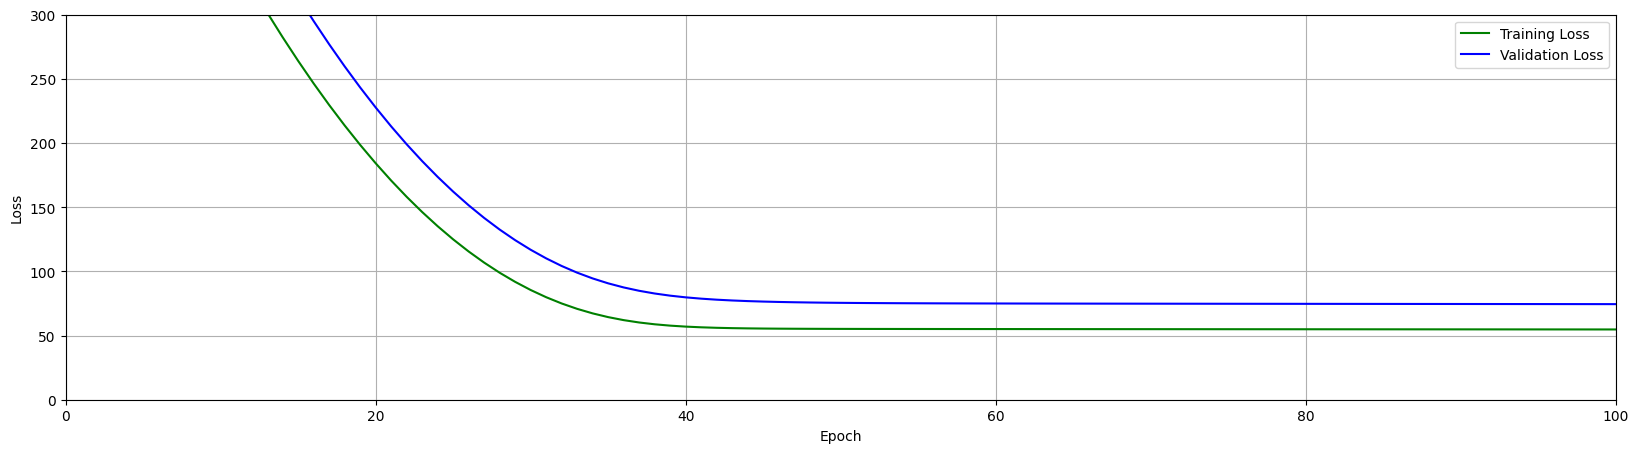

In [10]:
plot_loss(history)

## Prediction

In [11]:
import numpy as np

# Convert list to NumPy array
x = np.array([3, 4, 5, 6, 7])

# Predict using the model
y_pred = model.predict(x)

# Display predictions
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Predicted price of a home with 3 rooms: $12.0K
Predicted price of a home with 4 rooms: $15.2K
Predicted price of a home with 5 rooms: $18.3K
Predicted price of a home with 6 rooms: $21.4K
Predicted price of a home with 7 rooms: $24.5K


C:\Users\gauri\AppData\Local\Temp\ipykernel_21596\3986202972.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))


In [12]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)
 
# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


## Conclusion

In [13]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

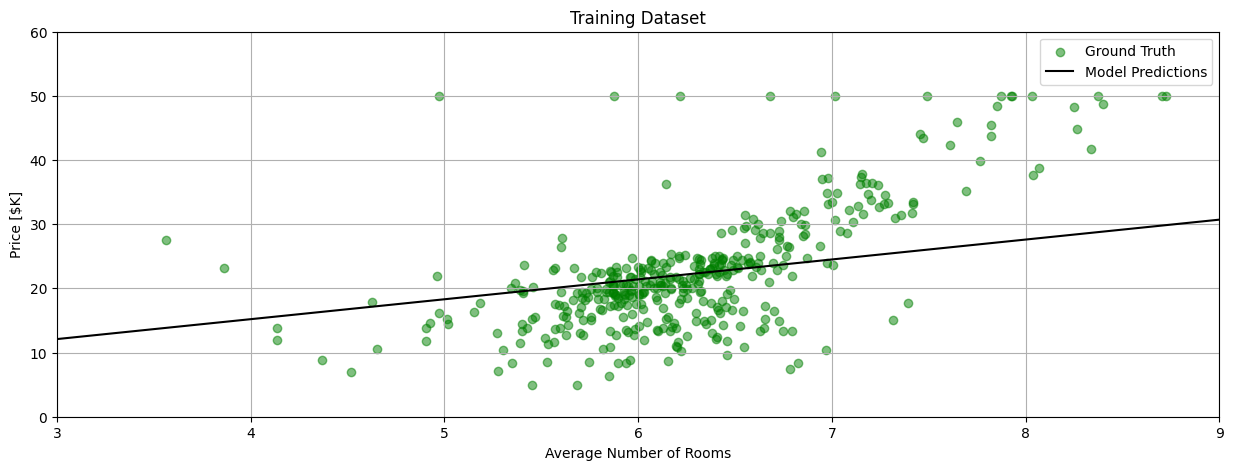

In [14]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

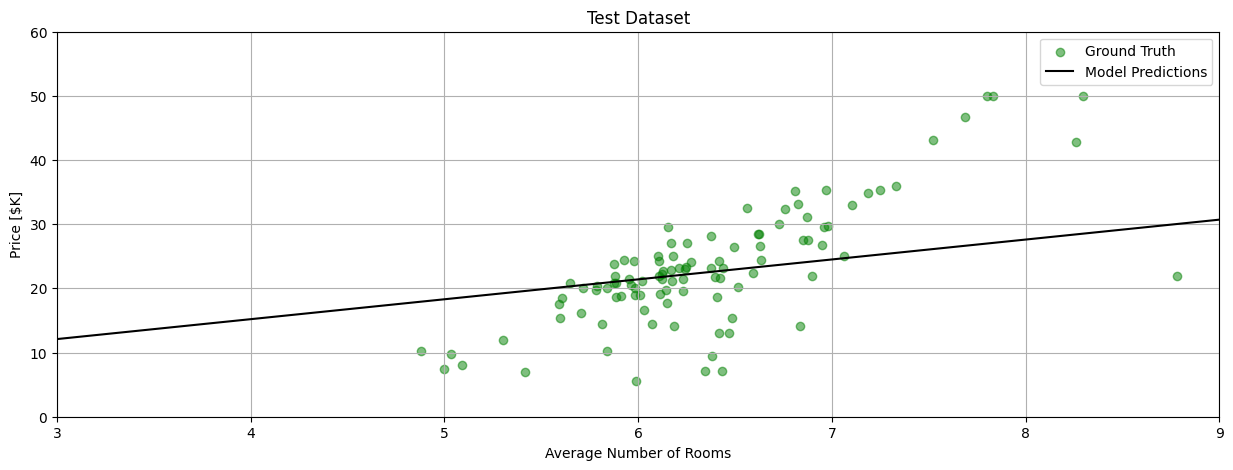

In [15]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')